 ###                 MULTIVARIATE LINEAR REGRESSION [OOP Edition]

This notebook is divided into two parts. "Model 1" __(MLR assignment)__ & "Model 2" __(OOP version)__ of the fore-mentioned.
Both of these models seek to predict employee salaries from different employee characteristics (or features).

#### **This assignment addresses the following:**

[Exploratory Data Analysis -EDA](#EDA) 
<a href='EDA'> </a>

[Feature Engineering](#feng)
<a href='feng'> </a>

[Correlation and Statistical Significance Analysis](#corr)
<a href='corr'> </a>

[~~Feature Selection~~](#select)
<a href='select'> </a>

[Model Training](#train)
<a href='train'> </a>

[Predictions](#predict)
<a href='predict'> </a>

[Model Evaluation](#eval)
<a href='eval'> </a>

[OOP for Data Science](#oop)
<a href='oop'> </a>


### Required Packages:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

### Navigation:

## [MODEL 1](#MLR)   



## [MODEL 2](#OOP)

### MLR

<a id='EDA'></a> <div class="alert alert-block alert-info">

### Exploratory Data Analysis (EDA)
- Data Ingestion
- Data Preprocessing
 </div>

In [32]:
sal = pd.read_csv('data/salary.csv')

In [33]:
#Examine DataSet
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


* Our target variable (salary) has one missing value.

In [34]:
#Method to fix missing value
sal['salary'].fillna(sal['salary'].mean(),inplace = True)
#sal = sal.drop_duplicates()

* Missing value has been filled w/ mean. Duplicates would be dropped if dataset had any 
* Filled w/ mean instead of dropping because salary is the target variable and every observation has its relevance

In [35]:
sal.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12672.762650,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60306.250000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


* The above table tells us the number of observations (514). We expect salary to have 514 because the missing value is now represented by the mean.
* The descriptive statistics table also tells us about the means, standard deviations, min and max values as well as the percentiles.


 <a id='feng'></a> <div class="alert alert-block alert-info">

### Feature Engineering
 </div>

In [36]:
import plotly.graph_objs as go

field = ['Engineering', 'Finance', 'Human Resources', 'Marketing']
trace = go.Pie(labels = field, values = sal.Field)
data = [trace]
layout = go.Layout(
   {"title":"Career Fields"})
fig = go.Figure(data,layout)
fig.show()

The purpose of this graph is to have an understanding of which career fields are the most dominant within the dataset. The Marketing profession accounts for 33.3%, Eng & HR are tied at second place leaving Finance in last.

In [37]:
dummies = pd.get_dummies(sal['Field'])

dum = dummies.rename(columns={1:'engineering',2:'finance',3:'HR',4:'marketing'})

sal2 = pd.concat([sal, dum] ,axis=1, ignore_index=False)
sal2.drop("Field", inplace=True, axis=1)

In [38]:
sal2['log_salary'] = np.log(sal2.salary)

Logarithmic transformations are used to make  better predicted outcomes from a linear reg model.


 <a id='corr'></a> <div class="alert alert-block alert-info">

### Correlation Analysis and Statistical Significance 
 </div>

> __Model 1 Features:__  exprior, yearsworked, yearsrank, market, degree, otherqual, position, male,
Field_dummyvariable1, Field_dummyvariable2, Field_dummyvariable3, yearsabs

In [39]:
sal_corr = sal2.corr()
sal_corr.style.background_gradient(cmap = 'coolwarm')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,engineering,finance,HR,marketing,log_salary
salary,1,0.119946,0.623135,0.61058,0.407208,0.0445522,0.167129,0.701354,0.361447,-0.0696218,0.425924,0.231553,-0.435677,-0.216296,0.990429
exprior,0.119946,1,-0.246549,-0.066403,-0.0350411,-0.0493727,0.264804,0.116596,0.0465577,0.13238,0.0541538,0.00218748,-0.0403305,-0.0156135,0.106405
yearsworked,0.623135,-0.246549,1,0.813471,-0.0708964,0.028421,-0.04049,0.746736,0.278963,0.0554682,0.216959,0.150811,-0.268122,-0.0971752,0.642096
yearsrank,0.61058,-0.066403,0.813471,1,-0.0269746,0.00651583,0.0070362,0.48521,0.237787,0.0356316,0.197874,0.169645,-0.241797,-0.122602,0.59932
market,0.407208,-0.0350411,-0.0708964,-0.0269746,1,0.036408,0.0216917,-0.0133578,0.181201,-0.167068,0.198393,0.120506,-0.250137,-0.0670552,0.416704
degree,0.0445522,-0.0493727,0.028421,0.00651583,0.036408,1,-0.214717,0.0436796,0.061611,0.0293106,0.0839559,0.0347503,-0.063661,-0.0536791,0.0520841
otherqual,0.167129,0.264804,-0.04049,0.0070362,0.0216917,-0.214717,1,0.160311,0.0158332,-0.0176389,0.0297915,0.0954179,-0.0795858,-0.0444913,0.159607
position,0.701354,0.116596,0.746736,0.48521,-0.0133578,0.0436796,0.160311,1,0.318129,0.0297514,0.261283,0.139835,-0.307315,-0.0914754,0.724541
male,0.361447,0.0465577,0.278963,0.237787,0.181201,0.061611,0.0158332,0.318129,1,-0.622179,0.150364,0.024864,-0.163386,-0.0115481,0.369857
yearsabs,-0.0696218,0.13238,0.0554682,0.0356316,-0.167068,0.0293106,-0.0176389,0.0297514,-0.622179,1,-0.0235553,0.0295687,0.0118607,-0.0174304,-0.0490968


__Everything has a correlation but it is the strength of the correlation that we are interested in.__
* Based on the above table these features are good predictors for salary; yearsworked, yearsrank, position and Field

* As per assignment instructions ALL features will be used for Model 1.


<a id='select'></a> <div class="alert alert-block alert-info">
    
      N/A FOR THIS ASSIGNMENT!  

# ~~Feature Selection~~

 </div>

 <a id='train'></a> <div class="alert alert-block alert-info">

### Model Training
 </div>

__Dataset is split into a train & test set. 
70% of the data will go into the training set and the remaining 30% will be used for testing.__

In [40]:
from statsmodels.formula.api import ols

In [41]:
#split data
x = sal2.drop(['salary','log_salary'] , axis=1)
y = sal2["log_salary"]

x = sm.add_constant(x)

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3, random_state=50)

In [42]:
model1 = sm.OLS(Y_train, X_train).fit()

In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 25 May 2020   Prob (F-statistic):          2.52e-131
Time:                        04:50:29   Log-Likelihood:                 325.18
No. Observations:                 359   AIC:                            -624.4
Df Residuals:                     346   BIC:                            -573.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8185      0.041    191.941      0.000       7.738       7.899
exprior         0.0028      0.002      1.861      0.064      -0.000       0.006
yearsworked    -0.0019      0.002     -1.033      0.302      -0.006       0.002
yearsrank       0.0144      0.002      8.322      0.000       0.011       0.018
market          0.6181      0.040     15.616      0.000       0.540       0.696
degree          0.0089      0.030      0.301      0.764      -0.049       0.067
otherqual       0.0484      0.029      1.695      0.091      -0.008       0.105
position        0.1569      0.013     11.748      0.000       0.131       0.183
male            0.0209      0.018      1.155      0.249      -0.015       0.056
yearsabs        0.0002      0.000      0.375      0.708      -0.001       0.001
engineering     2.0158      0.016    124.675      0.000       1.984       2.048
finance         1.9815      0.015    130.940      0.000       1.952       2.011
HR              1.9020      0.012    163.590      0.000       1.879       1.925
marketing       1.9193      0.013    149.386      0.000       1.894       1.945
==============================================================================
Omnibus:                        5.632   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.588
Skew:                           0.305   Prob(JB):                       0.0612
Kurtosis:                       3.016   Cond. No.                     1.36e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared value reveals the quality of the regression model. It describes the relationships between dependent and independent variables in a model. The R-squared value for this model was 0.66. Now, having used more features & did log transformation, it is now 0.84.
This means the accuracy of the model is approx 84%.

## OOP

<a id='oop'></a> <div class="alert alert-block alert-info">

### OOP for Data Science
 </div>

### Assignment Outline

It is efficient to put machine learning models and other data science techniques into classes so that we can reuse them later and change attributes without changing the code behind these models. Independent concepts can also be put into independent classes: for example, the functioning of a cross-validate class should not affect the functioning of a linear regression class.

> Create a class called __ErrorCalculator__ that has methods to compute __the residuals, standardised residuals, Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).__ 
Name these methods __get_residuals__, __get_standardised_residuals__, __get_mse__ and __get_rmse__ respectively. 
You can also have a method, __error_summary__ that prints the average, minimum and maximum of the standardised residuals, as well as the MSE and RMSE.
The class should have the following parameters:

      y: A 1D array of the target variable, size n_observations
      y_pred: A 1D array of the predicted values of the target variable, size n_observations

In [44]:
from src.ErrorCalculator import ErrorCalculator

> Create a generic class called __Plotter__. This class should have a method, run_calculations, to calculate the residuals if they have not yet been calculated, and a method plot, which simply plots a histogram of the residuals.
As before, the class should have the following parameters:

     y: A 1D array of the target variable, size n_observations
     y_pred: A 1D array of the predicted values of the target variable, size n_observations

> Create two child classes, __HistogramPlotter__ and __ScatterPlotter__, that both inherit from Plotter. As the name suggests, HistogramPlotter.plot() should return a histogram of the residuals, whereas ScatterPlotter.plot() should return scatterplots of the residual versus predicted values and the predicted versus observed values. 

In [45]:
from src.Plotter import Histogram_Plotter, Scatter_Plot, Distplot

In [46]:
oop = pd.read_csv('data/salary.csv')

In [47]:
#Method to fix missing value
oop['salary'].fillna(oop['salary'].mean(),inplace = True)

certain markdowns have been omitted because they would be repetitive from model 1

In [48]:
oop['log_salary'] = np.log(oop.salary)

In [49]:
dummies = pd.get_dummies(oop['Field'])

dum = dummies.rename(columns={1:'engineering',2:'finance',3:'HR',4:'marketing'})

oop2 = pd.concat([oop, dum] ,axis=1, ignore_index=False)
oop2.drop("Field", inplace=True, axis=1)


> Use the model you built in the MLR project to predict log-transformed salary (log_salary). Also create a second multiple regression model which does not include yearsrank as a feature. Save these model instances as model1 and model2. 

### Train Test Split for Model 2 

In [50]:
#split data
x2 = oop.drop(['salary', 'log_salary', 'yearsrank'], axis=1)
y2 = oop["log_salary"]

x2 = sm.add_constant(x2)

X_train2,X_test2,Y_train2,Y_test2 = train_test_split(x2,y2,test_size=0.3, random_state=50)

In [51]:
model2 = sm.OLS(Y_train2, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 25 May 2020   Prob (F-statistic):          5.19e-118
Time:                        04:50:33   Log-Likelihood:                 285.31
No. Observations:                 359   AIC:                            -550.6
Df Residuals:                     349   BIC:                            -511.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.8602      0.059    165.739      0.000       9.743       9.977
exprior         0.0087      0.002      5.751      0.000       0.006       0.012
yearsworked     0.0111      0.001      9.575      0.000       0.009       0.013
market          0.6752      0.043     15.847      0.000       0.591       0.759
degree          0.0018      0.033      0.056      0.956      -0.063       0.067
otherqual       0.0932      0.031      2.983      0.003       0.032       0.155
position        0.1034      0.013      8.207      0.000       0.079       0.128
male            0.0120      0.020      0.599      0.550      -0.027       0.051
Field          -0.0380      0.006     -6.751      0.000      -0.049      -0.027
yearsabs       -0.0004      0.000     -0.759      0.449      -0.001       0.001
==============================================================================
Omnibus:                        5.642   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.545
Skew:                           0.303   Prob(JB):                       0.0625
Kurtosis:                       3.051   Cond. No.                         252.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='predict'></a> <div class="alert alert-block alert-info">

#### Predictions & Model Testing


Predicting salary using the test set.
 </div>

In [52]:
m1_pred = model1.predict(X_test)
m2_pred = model2.predict(X_test2)

We use the __X_test__ data to pass in features the model has never seen

In [53]:
df_compare = pd.concat([m1_pred, m2_pred, Y_test, Y_test2],axis=1)
# df_compare

<a id='eval'></a> <div class="alert alert-block alert-info">

#### Model Evaluations
Regression Evaluation Metrics

 </div>

#### 3 common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

All of these are **loss functions**. We want to minimize them to create the best model.

### MSE

In [54]:
errors_m1 = ErrorCalculator(Y_test, m1_pred)
m1_mse = errors_m1.get_mse()
errors_m2 = ErrorCalculator(Y_test2, m2_pred)
m2_mse = errors_m2.get_mse()

In [55]:
print(f'Model1 MSE: {m1_mse}')
print(f'Model2 MSE: {m2_mse}')
print(f'MSE diff: {m2_mse - m1_mse}')

Model1 MSE: 0.01277527520692876
Model2 MSE: 0.013617789389795517
MSE diff: 0.0008425141828667573


### RMSE

In [56]:
rmse_m1 = errors_m1.get_rmse()
rmse_m2 = errors_m2.get_rmse()

In [57]:
print(f'Model1 RMSE: {rmse_m1}')
print(f'Model2 RMSE: {rmse_m2}')
print(f'MSE diff: {rmse_m2 - rmse_m1}')


Model1 RMSE: 0.11302776299179224
Model2 RMSE: 0.11669528435114898
MSE diff: 0.0036675213593567457


- RMSE indicates the absolute fit of the model to the data (how close the actual data points are to the model's predicted ones.)
- RMSE is a good measure of how accurately the model predicts the target variable. It is the most important criteria for fit if the main purpose of the model is prediction.

Model2 has a higher RMSE (but only by a very small margin). 
This can be attributed to a different feature (yearsranked) being used.

### MAE


In [58]:
mae_m1 = errors_m1.get_mae()
mae_m2 = errors_m2.get_mae()

In [59]:
print(f'Model1 MAE: {mae_m1}')
print(f'Model2 MAE: {mae_m2}')
print(f'MAE diff: {mae_m2 - mae_m1}')


Model1 MAE: 0.00841845045492749
Model2 MAE: 0.008528970736954269
MAE diff: 0.00011052028202677804


<a id='plots'></a> <div class="alert alert-block alert-info">

## Visual EDA

- Histogram
- Scatterplot
- Distplot
 </div>

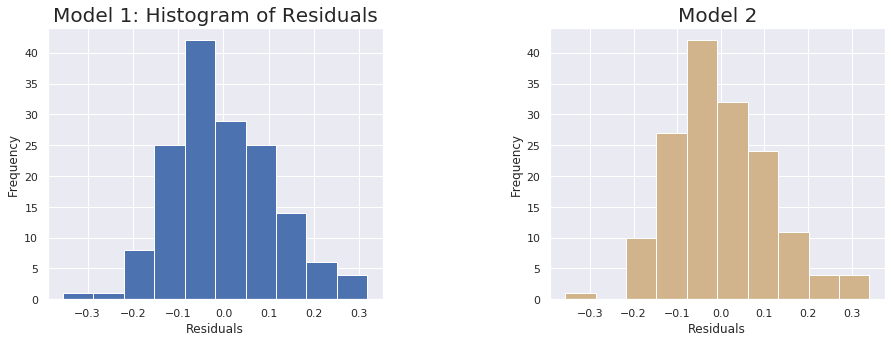

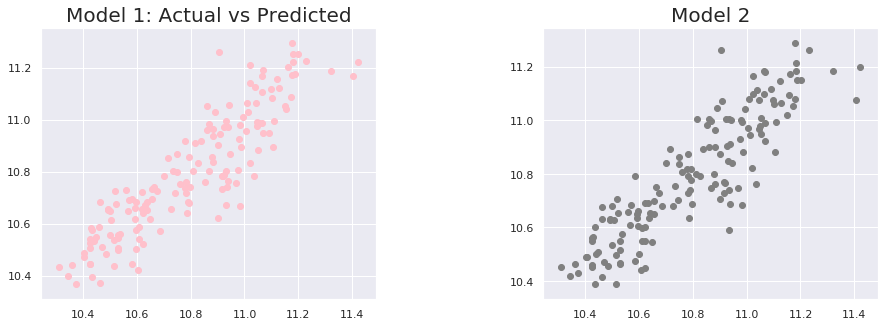

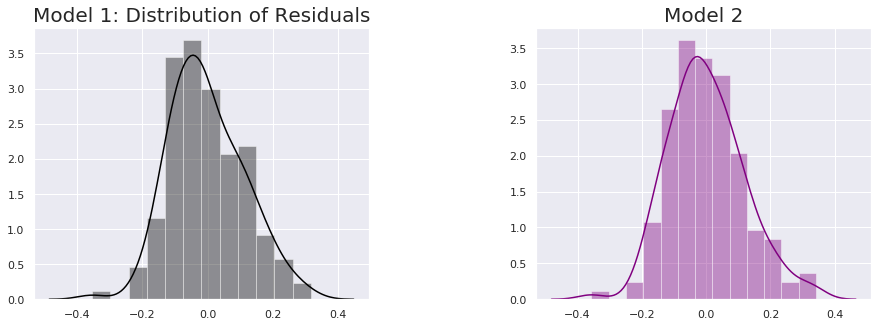

In [60]:
# M O D E L 1 & M O D E L 2
#Histogram
model_hist = Histogram_Plotter(Y_test, m1_pred, Y_test2, m2_pred)
model_hist.plot()
#Scatter Plot
model_scatter = Scatter_Plot(Y_test, m1_pred, Y_test2, m2_pred)
model_scatter.plot()
#Distplot
model_dist = Distplot(Y_test, m1_pred, Y_test2, m2_pred)
model_dist.plot()


- The figure is normally distributed
- This is a good sign because it means this model is a correct choice for the data



Model 1 is the better regression model based on the fact that it has a higher R-Squared value (4% higher than Model 2).
I mentioned earlier that the R-Squared value speaks to the quality of the model. Since Model 1 has a higher chance of predicting accurately I conclude that it is better.